# Исследовательский проект: Анализ данных о продажах компьютерных игр

**Введение**

В интернет-магазине «Стримчик» мы продаем компьютерные игры по всему миру. Наша задача — выявить закономерности, определяющие успешность игр, и спланировать эффективные рекламные кампании. Для этого мы будем анализировать исторические данные о продажах игр, оценках пользователей и экспертов, жанрах, платформах и возрастных рейтингах.

**Описание данных**

- Name — название игры
- Platform — платформа
- Year_of_Release — год выпуска
- Genre — жанр игры
- NA_sales — продажи в Северной Америке (миллионы проданных копий)
- EU_sales — продажи в Европе (миллионы проданных копий)
- JP_sales — продажи в Японии (миллионы проданных копий)
- Other_sales — продажи в других странах (миллионы проданных копий)
- Critic_Score — оценка критиков (максимум 100)
- User_Score — оценка пользователей (максимум 10)
- Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

**Данные за 2016 год могут быть неполными.**

<div style="font-size: 20px">
План исследования
</div >

**1.Подготовка данных:**
- Откроем файл с данными и изучим общую информацию.
- Заменим названия столбцов, приведя их к нижнему регистру.
- Преобразуем данные в нужные типы.
- Обработаем пропуски, если они есть.

**2.Исследовательский анализ данных:**

- Исследуем, сколько игр выпускалось в разные годы. Определим, важны ли данные за все периоды.
- Проанализируем, как менялись продажи по платформам. Выберем платформы с наибольшими суммарными продажами и построим распределение по годам.
- Выберем актуальный период для построения прогноза на 2017 год, исключив данные за предыдущие годы.
- Определим лидирующие по продажам платформы и выявим потенциально прибыльные.

**3.Анализ влияния отзывов на продажи:**

- Исследуем, как влияют на продажи отзывы пользователей и критиков.
- Построим диаграммы размаха по глобальным продажам игр для актуальных платформ.
- Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами для самой популярной из актуальных платформ.
- Изучим зависимость продаж от игровых жанров.

**4.Портрет пользователя каждого региона:**

- Изучим самые популярные платформы и жанры в регионах NA (Северная Америка), EU (Европа) и JP (Япония).
- Исследуем влияние возрастного рейтинга ESRB на продажи в отдельных регионах.
- Изучим популярность разных жанров по регионам.

**5.Проверка гипотез:**

 Проверим две гипотезы:

- Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.
- Средние пользовательские рейтинги жанров Action и Sports разные.


**6.Общий вывод:**
- Сформулируем общие выводы на основе проведенного анализа.

## Подготовка данных


### Откроем файл с данными и изучим общую информацию.

In [1]:
# Подключаем библиотеки

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import re
from scipy import stats as st

# Загружаем датасет
df = pd.read_csv('/datasets/games.csv')

In [2]:
# Изучаем общую информации о данных
display(df.info())
display(df.describe())
print()


# Отображаем первые 5 строк датасета
display(df.head(5))


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


None

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


Количество явных дубликатов в датасете: 0


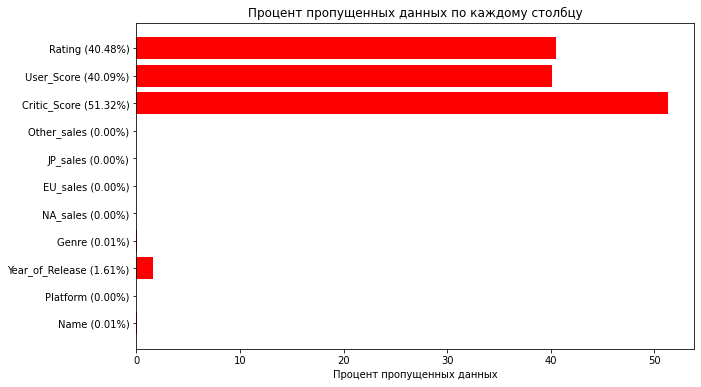

In [3]:
# Оценим количество явных дубликатов и пропусков
print('Количество явных дубликатов в датасете:', df.duplicated().sum())
# Рассчитываем процент пропущенных данных
missing_data = df.isnull().sum() / len(df) * 100

# Добавляем проценты пропусков в названия столбцов
columns_with_percents = [f'{col} ({val:.2f}%)' for col, val in zip(missing_data.index, missing_data.values)]

# Создаем график
plt.figure(figsize=(10, 6))
plt.barh(columns_with_percents, missing_data.values, color='red')
plt.title('Процент пропущенных данных по каждому столбцу')
plt.xlabel('Процент пропущенных данных')
plt.show()

Наблюдаем следующие проблемы с данными:
- Названия столбцов имеют не единообразный вид, для удобства приведем их к нижнему регистру
- Столбец Year_of_Release имеет тип float64, хотя содержит только четырехзначные целые числа года выпуска. Приведем его к целочисленному типу
- Столбцы Critic_Score и User_Score содержат оценки по 100 балльной и 10 балльной шкале соответственно. Приведем их к единому виду.
- На графике видно огромный процент пропусков в столбцах Rating, User_Score и Critic_Score (40,48%, 40,09% и 51,32% соответственно). Также видно небольшой процент пропусков в столбцах Year_of_Release (1,61%), Year_of_Release и Name (по 0,1%). Пропуски будет необходимо обработать.
- В дальнейшем для анализа нам потребуются данные о суммарных продажах по всем регионам. Создадим столбец total_sales с этими данными.

### Заменим названия столбцов, приведя их к нижнему регистру.

In [4]:
# Приводим названия столбцов к нижнему регистру
df.columns = df.columns.str.lower()
# Отображаем первые 5 строк обновленного датасета
df.head(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


### Преобразуем данные в нужные типы.

In [5]:
# Преобразуем столбец 'year_of_release' в тип integer. Пропуски заменим на  маркер 0.
df['year_of_release'] = df['year_of_release'].fillna(0).astype(int)
# Преобразуем столбец с продажами и оценками в числовой тип (миллионы проданных копий)
columns = ['na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'critic_score', 'user_score']
df[columns] = df[columns].apply(pd.to_numeric, errors='coerce')
# Отображаем первые 5 строк обновленного датасета
display(df.head(5))
display(df.info())

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16715 non-null  int64  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


None

### Приведем оценки критиков и  пользователей к единому виду.

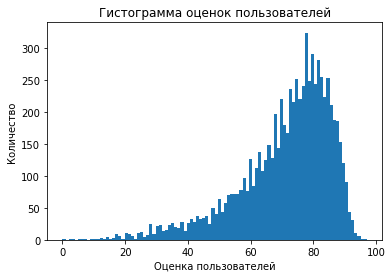

In [6]:
# Преобразовываем user_score в ту же шкалу, что и critic_score
df['user_score'] = df['user_score'] * 10
# Убедимся, что значения user_score обновленного датасета корректны
# Построим гистограмму, чтобы убедиться, что аномальных значений нет
plt.hist(df['user_score'], bins=int(df['user_score'].max() - df['user_score'].min() + 1))
plt.title('Гистограмма оценок пользователей')
plt.xlabel('Оценка пользователей')
plt.ylabel('Количество')
plt.show()

### Обработаем пропуски.

Выведем общее количество пропусков в датасете. Учтем, что пропуски года выпуска мы заполнили нулями.

In [7]:
# Считаем пропуски в датасете
print('Количество пропусков в датасете:')
print(df.isnull().sum())
# Считаем пропуски года выпуска
print('Пропусков в year_of_release:', df[ df['year_of_release']==0].shape[0])
# Сохраненяем количество строк датасета в переменную для оценки процента отброшеных значений в дальнейшем
shape= df.shape[0]
print()
print('Всего строк в датасете: ', shape)

Количество пропусков в датасете:
name                  2
platform              0
year_of_release       0
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         9125
rating             6766
dtype: int64
Пропусков в year_of_release: 269

Всего строк в датасете:  16715


- **2** пропуска в названии и в жанрах игр. Выведем строки, в которых пропущено название.

In [8]:
display(df[df['name'].isna()])

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Видно, что пропуски в одних и тех же строках. Отбросим эти данные.

In [9]:
# Удаляем строки с пропущенными значениями в столбце 'name'
df = df.dropna(subset=['name'])
# Считаем пропуски в обновленном датасете
print('Количество пропусков в датасете:')
print(df.isnull().sum())

Количество пропусков в датасете:
name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8576
user_score         9123
rating             6764
dtype: int64


Как и ожидалось, пропуски в жанрах так же пропали.
- **8576** пропусков в оценках критиков и **9123** в оценках пользователей. Заполнять пропуски средним или медианой по жанру и году было бы неверно - оценки индивидувльны и зависят от качества игры. Возможно, это связано с годом выпуска игр - в первых строках датасета мы видели игру **1985г**. Тогда агрегированых оценок критиков и пользователей еще не существовало. Сейчас получить такие данные для игр даже того времени не составило бы большого труда, однако в рамках исследования заполним пропуски маркером **404**, в дальнейшем будем исключать его в исследованиях.

In [10]:
# Заполняем пропуски в столбцах 'critic_score' и 'user_score' значением 404
df['critic_score'].fillna(404, inplace=True)
df['user_score'].fillna(404, inplace=True)
# Считаем пропуски в обновленном датасете
print('Количество пропусков в датасете:')
print(df.isnull().sum())

Количество пропусков в датасете:
name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score          0
user_score            0
rating             6764
dtype: int64


- 6764 пропусков в возрастном рейтинге. Изучим, есть ли у нас жанры, для которых рейтинг ESRB не меняется. Выведем униккальные значения рейтинга для каждого жанра. Помним, что одним из уникальных значений будет NaN.

In [11]:
# Считаем уникальные значений в столбце 'rating' по каждому игровому жанру
df.groupby('genre')['rating'].nunique()

genre
Action          6
Adventure       5
Fighting        4
Misc            6
Platform        4
Puzzle          3
Racing          5
Role-Playing    4
Shooter         4
Simulation      4
Sports          4
Strategy        6
Name: rating, dtype: int64

Даже для пазлов не существует универсального рейтинга. Заполнять жанр модой было бы некоректно. Заполним пропуски маркером 404, в дальнейшем будем исключать его в исследованиях.

In [12]:
# Заполняем пропуски в столбце 'rating' значением 404
df['rating'].fillna(404, inplace=True)
# Считаем пропуски в обновленном датасете
print('Количество пропусков в датасете:')
print(df.isnull().sum())

Количество пропусков в датасете:
name               0
platform           0
year_of_release    0
genre              0
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score       0
user_score         0
rating             0
dtype: int64


- 269 пропусков года выхода. Для большей части игр восстановить его не удастся. Однако в спортивных играх зачастую год выхода можно понять из названия. Например, FIFA 2015 вышла в 2014 году, а Major League Baseball 2K8 в 2007. Изучим спортивные игры с пропущеным годом выхода.

In [13]:
print("в датафрейме содержатся данные с", df[df['year_of_release'] > 0]['year_of_release'].min(), "по", df['year_of_release'].max(), "год")
# Выводим данные с играми в жанре спорт с пропущеным годом выхода и кол-ва этих записей
display(df[(df['year_of_release'] == 0) & (df['genre'] == 'Sports')])
print('Всего записей: ', df[(df['year_of_release'] == 0) & (df['genre'] == 'Sports')].shape[0])

в датафрейме содержатся данные с 1980 по 2016 год


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,0,Sports,4.26,0.26,0.01,0.71,94.0,85.0,E
377,FIFA Soccer 2004,PS2,0,Sports,0.59,2.36,0.04,0.51,84.0,64.0,E
1301,Triple Play 99,PS,0,Sports,0.81,0.55,0.00,0.10,404.0,404.0,404
2479,Madden NFL 07,PSP,0,Sports,0.77,0.03,0.00,0.04,78.0,66.0,E
2492,MLB SlugFest 20-03,PS2,0,Sports,0.41,0.32,0.00,0.11,77.0,82.0,E
2536,Shaun White Snowboarding,X360,0,Sports,0.48,0.25,0.00,0.08,60.0,76.0,T
2572,PES 2009: Pro Evolution Soccer,PSP,0,Sports,0.04,0.33,0.26,0.17,404.0,404.0,404
2849,Madden NFL 11,Wii,0,Sports,0.68,0.00,0.00,0.04,75.0,54.0,E
3413,Madden NFL 06,X360,0,Sports,0.54,0.00,0.01,0.03,74.0,49.0,E
3486,Madden NFL 2002,XB,0,Sports,0.53,0.02,0.00,0.03,90.0,81.0,E


Всего записей:  42


In [14]:
# Заполненяем нулевые значения в 'year_of_release' на основе данных в 'name'

for i in df[(df['year_of_release'] == 0) & (df['genre'] == 'Sports')].index:
        name = df.loc[i, 'name']
        # Ищем'2K' за которым следует целое число в названии игры
        match_2k = re.search('2K(\d+)', name)
        # Ищем год в двухциферном и четырехциферном формате в названии игры
        match_year = re.search('(\d{2,4})', name)
        # Если нашли '2K' за которым следует целое число
        if match_2k:
            n = int(match_2k.group(1))
            # Заменяем значения 'year_of_release' на 2000 + n - 1
            df.loc[i, 'year_of_release'] = 2000 + n - 1
        # Если нашли год в двухциферном и четырехциферном формате
        elif match_year:
            year = int(match_year.group(1))
            # Если год указан в двузначном формате
            if year < 100:
                # Если год больше 20, считаем что это относится к 20-му веку
                # Если год меньше или равен 20, считаем что это относится к 21-му веку
                year += 1900 if year > 20 else 2000
            # Меняем значения 'year_of_release' на найденный год
            df.loc[i, 'year_of_release'] = year
# Меняем все значения 1980 >'year_of_release' > 2016 на 0
df.loc[df['year_of_release'] < 1980, 'year_of_release'] = 0
df.loc[df['year_of_release'] > 2016, 'year_of_release'] = 0
# Если бы я подставил все года вручную - потратил бы в 10 раз меньше времени -_-
display(df[(df['year_of_release'] == 0) & (df['genre'] == 'Sports')])
print('Всего записей: ', df[(df['year_of_release'] == 0) & (df['genre'] == 'Sports')].shape[0])

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
2492,MLB SlugFest 20-03,PS2,0,Sports,0.41,0.32,0.00,0.11,77.0,82.0,E
2536,Shaun White Snowboarding,X360,0,Sports,0.48,0.25,0.00,0.08,60.0,76.0,T
3739,NBA Street Vol. 2,GC,0,Sports,0.41,0.11,0.00,0.01,88.0,81.0,E
3883,Fishing Derby,2600,0,Sports,0.48,0.03,0.00,0.01,404.0,404.0,404
4635,NHL Slapshot,Wii,0,Sports,0.39,0.00,0.00,0.02,76.0,81.0,E
6636,Jonah Lomu Rugby Challenge,PS3,0,Sports,0.00,0.19,0.00,0.06,64.0,404.0,E
6999,Tony Hawk's Downhill Jam,Wii,0,Sports,0.21,0.00,0.00,0.02,69.0,62.0,E10+
7108,Big Beach Sports 2,Wii,0,Sports,0.09,0.11,0.00,0.02,404.0,404.0,E
7387,Move Fitness,PS3,0,Sports,0.00,0.16,0.00,0.05,404.0,404.0,404
7605,Famista 64,N64,0,Sports,0.00,0.00,0.17,0.03,404.0,404.0,404


Всего записей:  22


Остальные пропуски останутся равными 0. В дальнейшем исключим их из исследований. 
Убедимся, что в датасете не осталось пропусков и что количество отброшеных данных не привышает 10%.

In [15]:
# Считаем пропуски в датасете
print('Количество пропусков в датасете:')
print(df.isnull().sum())
# Считаем процент отборошеных данных
print('В ходе предобработки данных было отброшено ', round( (100 - (df.shape[0])*100/shape) ,2), '% данных' )

Количество пропусков в датасете:
name               0
platform           0
year_of_release    0
genre              0
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score       0
user_score         0
rating             0
dtype: int64
В ходе предобработки данных было отброшено  0.01 % данных


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16713 non-null  int64  
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     16713 non-null  float64
 9   user_score       16713 non-null  float64
 10  rating           16713 non-null  object 
dtypes: float64(6), int64(1), object(4)
memory usage: 2.0+ MB


### Проверим столбцы с категориальными значениями на неявные дубли и аномалии.

In [17]:
# Выводим все уникальные значения и их количество для 'platform'
print("Уникальные значения для 'platform':")
print(df['platform'].value_counts())
print()
# Выводим все уникальные значения и их количество для 'genre'
print("Уникальные значения для 'genre':")
print(df['genre'].value_counts())
print()
# Выводим все уникальные значения и их количество для 'rating'
print("Уникальные значения для 'rating':")
print(df['rating'].value_counts())

Уникальные значения для 'platform':
PS2     2161
DS      2151
PS3     1331
Wii     1320
X360    1262
PSP     1209
PS      1197
PC       974
XB       824
GBA      822
GC       556
3DS      520
PSV      430
PS4      392
N64      319
XOne     247
SNES     239
SAT      173
WiiU     147
2600     133
NES       98
GB        98
DC        52
GEN       27
NG        12
WS         6
SCD        6
3DO        3
TG16       2
GG         1
PCFX       1
Name: platform, dtype: int64

Уникальные значения для 'genre':
Action          3369
Sports          2348
Misc            1750
Role-Playing    1498
Shooter         1323
Adventure       1303
Racing          1249
Platform         888
Simulation       873
Fighting         849
Strategy         683
Puzzle           580
Name: genre, dtype: int64

Уникальные значения для 'rating':
404     6764
E       3990
T       2961
M       1563
E10+    1420
EC         8
K-A        3
RP         3
AO         1
Name: rating, dtype: int64


Проблем не наблюдается.

### Добавим столбец с суммарными продажами.

In [18]:
# Создаем новый столбец 'total_sales', который является суммой продаж во всех регионах
df['total_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']
# Выводим первые п строк обновленного датасета
display(df.head(5))
display(df.info())

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,80.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,404.0,404.0,404,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,83.0,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,80.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,404.0,404.0,404,31.38


<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16713 non-null  int64  
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     16713 non-null  float64
 9   user_score       16713 non-null  float64
 10  rating           16713 non-null  object 
 11  total_sales      16713 non-null  float64
dtypes: float64(7), int64(1), object(4)
memory usage: 2.2+ MB


None

**Промежуточный вывод**

В ходе подготовки данных мы предприняли следующее:

-  Привели названия столбцов к нижнему регистру.
-  Преобразовали столбец  года выпуска в целочисленный тип, заменив все пропуски на маркер 0.  В дальнейшем будем исключать его из исследования.
-  Преобразовали столбцы с данными продаж в разных регионах, оценками критиков и оценками пользователей в цифровой тип, обработав ошибки как пропуски.
-  Привели оценки критиков и  пользователей к единому виду.
-  Отбросили 2 строки с пропусками в названии и жанре, так как эти данные критически важны и их отсутствие делает наблюдения непригодными для анализа.
-  Заполнили пропуски в столбцах с оценками критиков, оценками пользователей и возрастными рейтингами маркером 404.
-  Заполнили пропуски года выпуска спортивных игр, содержащих в названии год на год (содержащийся в названии- 1). Исключили игры, в названии которых год меньше 1985 и больше 2016 (диапазон в датасете).
-  Убедились, что в стобцах с платформами, жанрами и рейтингом отсутствуют неявные повторы и аномальные значения.
-  Добавили столбец с суммарными продажами по всем регионам.

## Исследовательский анализ данных.

### Исследуем, сколько игр выпускалось в разные годы.

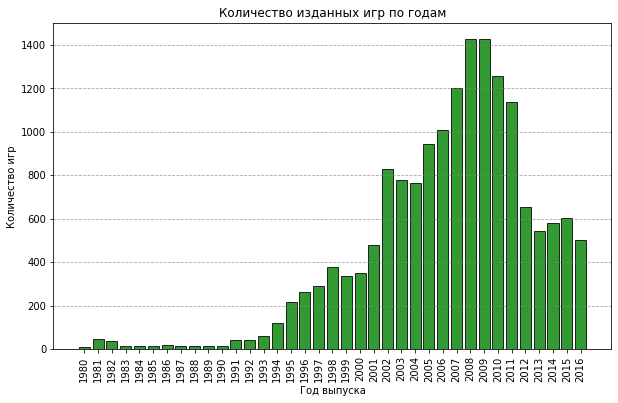

In [19]:
# Фильтруем датафрейм, чтобы включить только строки, где year_of_release больше маркерного значения 0 
df_filtered = df[df['year_of_release'] > 0]

# Группируем данные по году выпуска и считаем количество игр
games_per_year = df_filtered['year_of_release'].value_counts().sort_index()

# Рисуем столбчатую диаграмму
plt.figure(figsize=(10, 6))
plt.bar(games_per_year.index, games_per_year.values, alpha=0.8, color='green', edgecolor='black')
plt.xlabel('Год выпуска')
plt.ylabel('Количество игр')
plt.title('Количество изданных игр по годам')
plt.xticks(games_per_year.index, rotation=90)
plt.grid(axis='y', linestyle='--', which='both', color='grey', alpha=0.7)
plt.show()

Взглянув на график, мы можем сделать следующие выводы:
- С 1993 года начался взрывной рост в игровой индустрии, и количество выпускаемых игр стабильно увеличивалось каждый год до 2009 года. Особенно заметными были всплески роста в 2002 году (когда количество игр почти удвоилось по сравнению с предыдущим годом) и в период с 2005 по 2009 годы. Можно предположить, что это связано с распространением и доступностью игровых консолей шестого (PS2 и Xbox в 2000-2001 годах) и седьмого (PS3 и Xbox360 в 2005-2006 годах) поколений от Sony и Microsoft.
-  Пик выпуска игр пришелся на 2008-2009 годы. Затем на рынке произошло резкое снижение количества игр. Вероятно, это связано с тем, что до 2008 года было открыто множество игровых студий, а игры были проще в производстве из-за технических возможностей (качество графики, производительность и т.д.). Затем наступил экономический кризис 2008 года, который продолжался несколько лет. В течение следующих 3 лет игровая индустрия претерпела кардинальные изменения, из-за того, что мелкие и средние студии не пережили кризис и были вынуждены продаваться гигантам индустрии таким как activision, blizzard, EA, Ubisoft, THQ. Одновременно с этим, гиганты индустрии из-за огромных убытков сокращали бюджет на разработку и закрывали многие поглощенные студии. Все это в совокупности привело к спаду производства игр почти в 2.8 раза, если сравнивать 2009 и 2013 год. Тенденция сохранялась вплоть до 2019 года, когда развитие на рынке игровых движков и рост популярности онлайн площадок дистрибьюции (в первую очередь Steam) привело к лавинообразному росту количества издаваемых *инди игр* (игр, разработанных небольшими независимыми командами, состоящими зачастую из нескольких, а иногда даже из одного разработчика). Рост продолжается по сей день (2023 был рекордным по количеству изданных игр). Однако этого скачка не видно на графике т.к. данных после 2016  в датасете нет.
- Также обратим внимание, что в 2016 году количество игр ощутимо меньше, чем в 2015. Скорее всего это связано с тем, что данные за 2016 неполные, о такой возможности было известно при их получении.
- На основе графика можно сделать вывод, что **для исследования важны данные с 2013 года и далее** - закончился обвал количества выпускаемых игр и наметилась тенденция на рост.

### Проанализируем, как менялись продажи по платформам. Выберем платформы с наибольшими суммарными продажами и построим распределение по годам.

Топ 10 платформ по суммарным продажам:
platform
PS2     1255.77
X360     971.42
PS3      939.65
Wii      907.51
DS       806.12
PS       730.86
GBA      317.85
PS4      314.14
PSP      294.05
PC       259.52
Name: total_sales, dtype: float64


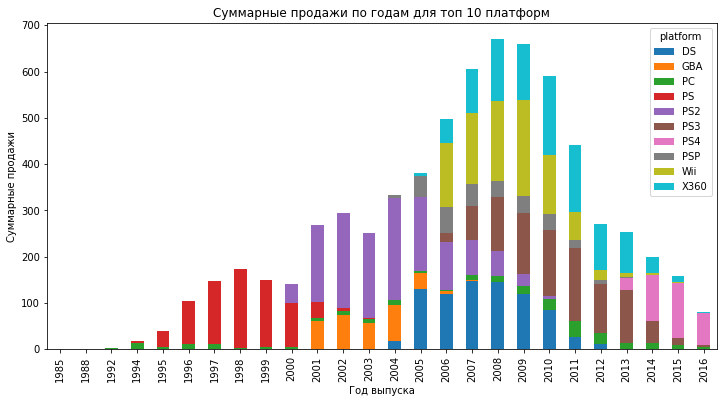

In [20]:

# Группируем данные по платформам и считаем суммарные продажи
platform_sales = df.groupby('platform')['total_sales'].sum()

# Выбираем топ 10 платформ с наибольшими суммарными продажами
top_platforms = platform_sales.nlargest(10)

# Выводим результат
print("Топ 10 платформ по суммарным продажам:")
print(top_platforms)

# Фильтруем датафрейм, чтобы включить только строки с топ платформами
df_top_platforms = df_filtered[df_filtered['platform'].isin(top_platforms.index)]

# Группируем данные по году выпуска и платформе, считаем суммарные продажи
sales_per_year_platform = df_top_platforms.groupby(['year_of_release', 'platform'])['total_sales'].sum().unstack()

# Рисуем график
sales_per_year_platform.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Суммарные продажи по годам для топ 10 платформ')
plt.xlabel('Год выпуска')
plt.ylabel('Суммарные продажи')
plt.show()


На графике хорошо видно сменяемость поколений платформ: 

- Единственная "консоль", чью долю можно заметить на протяжении всего графика - это PC. Несмотря на это, игры на персональный компьютер занимают только 10е место по продажам.
- Жизненный цикл остальных платформ на графике  7 - 12 лет. Ниже подробнее изучим жизненый цикл всех платформ в датасете.
- С 1995 по 2000 лидирует оригинальная Play Station.
- С 2001 ее уже обгоняет появившаяся в 2000 году PS2, конкуренцию по проданым играм до 2005 года для PS2 составляет только портативная GBA. 
- С 2004 GBA уже приходится делить рынок с ее наследницей - Nintdendo DS, и PSP. В 2005 GBA уже уступает по продажам DS. 
- Продажи игр PS2 обгоняют ее наследницу PS3 в два первые года жизни консоли следующего покаления (2004-2005). 
- В 2006 в гонке консолей становится заметно участие Microsoft с ее Xbox360,  однако с 2011 ее доля начинает заметно падать, сходя почти на нет к 2016 году. 
- В период с 2006 по 2009 доминируют продажи игр консолей Nintendo - игры на Wii и DS составляют половину всех проданных (в 2008 даже больше). Так же видно, что продажы портативной PSP заметны в течение целых 9 лет (с 2005 по 2012), последние из которых были уже после выпуска ее приемницы PS Vita, не получившей должной поддержки от Sony и сторонних разработчиков и, ожидаемо, не попавшей на этот график.
- Стоит обратить внимание, что, в отличии от PS2, PS3 быстро уступила рынок консоли следующего поколения PS4, доля которой с 2014 года составляет больше половины продаж на графике и растет вплоть до 2016.

Нельзя забывать, что топ у нас состоит из консолей всех поколений, большинство из которых к 2016 неактуальны. Построим график по данным из актуального периода, определенного нами ранее - **с 2013 по 2016**.

Изучим подробнее жизненный цикл всех платформ в датасете

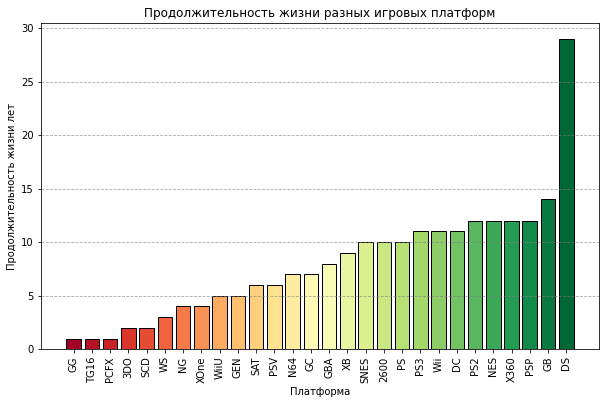

In [21]:
# Отфильтровываем из датасета бессмертный  'PC', вышедшие недавно PS4, Xbox One и 3DS и маркерные значения пропусков года выхода
df_lyfecycle = df[(df['platform'] != 'PC') & (df['platform'] != 'PS4') & (df['platform'] != 'Xone') & (df['platform'] != '3DS') & (df['year_of_release']!= 0)]

# Группируем данные по платформе и вычисляем минимальный и максимальный год выпуска для каждой платформы
lyfecycle = df_lyfecycle.groupby('platform')['year_of_release'].agg(['min', 'max'])

# Создаем новый столбец 'life', который представляет собой разницу между максимальным и минимальным годом выпуска
lyfecycle['life'] = lyfecycle['max'] - lyfecycle['min'] + 1

# Удаляем столбцы 'min' и 'max'
lyfecycle = lyfecycle.drop(['min', 'max'], axis=1)

# Сбрасываем индекс
lyfecycle = lyfecycle.reset_index()

# Сортируем данные по столбцу 'life'
lyfecycle = lyfecycle.sort_values(by='life')

# Создаем градиент цветов от красного к зеленому
colors = plt.cm.RdYlGn(np.linspace(0, 1, len(lyfecycle)))

# Создаем столбчатый график с градиентом цветов
plt.figure(figsize=(10,6))
plt.bar(lyfecycle['platform'], lyfecycle['life'], color=colors, edgecolor='black')
plt.xlabel('Платформа')
plt.ylabel('Продолжительность жизни лет')
plt.title('Продолжительность жизни разных игровых платформ')
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', which='both', color='grey', alpha=0.7)
plt.show()



- На графике видно консоли, жизненный цикл которых начался, неуспев начаться: на **Sega Game Gear**, **PC-FX** и **TurboGrafx-16** игры выходили только в год выхода консолей. 
- Недалеко от них ушли **3DO** и **Sega CD** жизненным циклом всего в 2 года.
- С другой стороны слильно выдиляется **Nintendo DS**, игры на которую выходили почти 30 лет.

Отфильтруеим эти значения и найдем среднюю и медианную продолжительность жизни консолей.

In [22]:
lyfecycle = lyfecycle[(lyfecycle['life'] > 2) & (lyfecycle['life'] < 20)]
# Вычисляем средний срок жизни игровых платформ
average_life = lyfecycle['life'].mean()
print('Средний срок жизни игровых платформ: %.1f лет' % average_life)

# Вычисляем медианный срок жизни игровых платформ
median_life = lyfecycle['life'].median()
print('Медианный срок жизни игровых платформ: %.1f лет' % median_life)

Средний срок жизни игровых платформ: 8.6 лет
Медианный срок жизни игровых платформ: 9.5 лет


Топ 10 платформ по суммарным продажам c 2013 по 2016:
platform
PS4     314.14
PS3     181.43
XOne    159.32
3DS     143.25
X360    136.80
WiiU     64.63
PC       39.43
PSV      32.99
Wii      13.66
PSP       3.50
Name: total_sales, dtype: float64


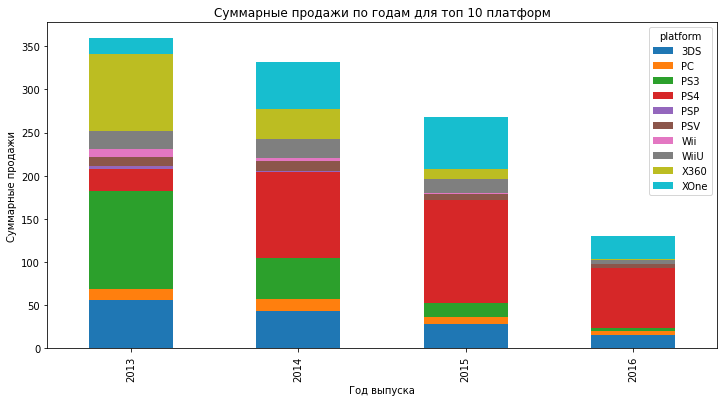

In [23]:
# Фильтруем датафрейм, чтобы включить только строки, где year_of_release больше 2013
df_actual = df_filtered[df_filtered['year_of_release'] >= 2013]

# Группируем данные по платформам и считаем суммарные продажи
platform_sales_actual = df_actual.groupby('platform')['total_sales'].sum()

# Выбираем топ 10 платформ с наибольшими суммарными продажами
top_platforms_actual = platform_sales_actual.nlargest(10)

# Выводим результат
print("Топ 10 платформ по суммарным продажам c 2013 по 2016:")
print(top_platforms_actual)

# Фильтруем датафрейм, чтобы включить только строки с топ платформами
df_top_platforms_actual = df_actual[df_actual['platform'].isin(top_platforms_actual.index)]

# Группируем данные по году выпуска и платформе, считаем суммарные продажи
sales_per_year_platform_actual = df_top_platforms_actual.groupby(['year_of_release', 'platform'])['total_sales'].sum().unstack()

# Рисуем график
sales_per_year_platform_actual.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Суммарные продажи по годам для топ 10 платформ')
plt.xlabel('Год выпуска')
plt.ylabel('Суммарные продажи')
plt.show()


**Промежуточный вывод**:

- **Актуальный период** для наших исследований **2013 - 2016**. В **2013** закончился обвал количества выпускаемых игр и наметилась тенденция на рост.
- На этом периоде безоговорочный лидер по продажам - это **PS4**. Если мы ограничены разработкой на одной платформе, **Play Station 4** - очевидный выбор. Консоль находится на пике своего жизненного цикла - напомним,что средняя продолжительность жизни игровой консоли, найденная нами ранее - **8,6 лет**. Консоли следующего поколения еще даже не анонсированы.
- Доля игр, проданых на **Xbox One** так же значима, хоть и составляет по всему графику порядка двух раз меньше, чем **PS4**. Учитывая схожесть их технических характеристик, имеет смысл паралельная разработка версий для обеих платформ.
- Если планируется разработка версий на несколько платформ - не стоит забывать и о **Персональных компьютерах**. Хоть их доля на графике и не слишком значительна, по проданым играм они поднялись с 10 (по данным с 1985г) до 7 (по данным с 2013г) места. Учитывая то, что **ПК** игнорирует правила жизненного цикла, действующие для остальных консолей, это может принести компании большую прибыль в долгосрочной перспективе. Анекдотичный пример - я буквально в середине марта этого года купил на ПК игру, вышедшую более 15 лет назад, и это не было дешево.
- Касательно порта для портативных консолей: Очевидный лидер на рынке - **Nintendo 3DS**. Однако, если компания планирует паралелльно игре для домашней консоли выпустить адаптированную мобильную версию - с переносом ее на **3DS** возникнут сложности: разница в производительности домашних консолей и 3DS колоссальна. Так же ее основные продающие особенности - 2 экрана, стереоскопическая картинка, тачскрин, интеграция работы с фото и с NFC (фигурки Amibo) для дополненной реальности - не имеют близких аналогов на домашних консолях. Сопутствующий мобильный продукт придется паралельно писать с нуля, использовать что-то кроме сценария, звуков и спрайтов с версии для старших консолей скорее всего не получится. Гораздо лучше на роль консоли для адаптации старшей версии подошла бы **PS Vita** -она намного ближе по характеристикам к домашним консолям, близка по архитектуре к **PS4**. Однако, ее продажи на графике даже ниже, чем у WiiU, которую мы даже не рассматриваем как потенциальную консоль для разработки, как раз из-за разачаровывающих продаж. Единственный кейс, при котором будет иметь смысл разрабатывать что-то для **PS Vita** - эксклюзивная сделка с Sony, и даже в этом случае рентабельность подобного предприятия сомнительна. 
- Если же компания изначально нацелена именно на мобильные платформы - тогда все проще. Очевидный выбор - **Nintendo 3DS**. На 2016 год на рынке мобильных игр у него всего один конкурент - смартфоны. *Ситуация поменяется в 2017 с выходом Nintendo Switch, но эксклюзивы для свича разрабатывют эксклюзивно сама Nintendo и ее партнеры*.


## Анализ влияния отзывов на продажи.

### Исследуем, как влияют на продажи отзывы пользователей и критиков.

Для начала оценим средние оценки критиков и пользователей по платформам

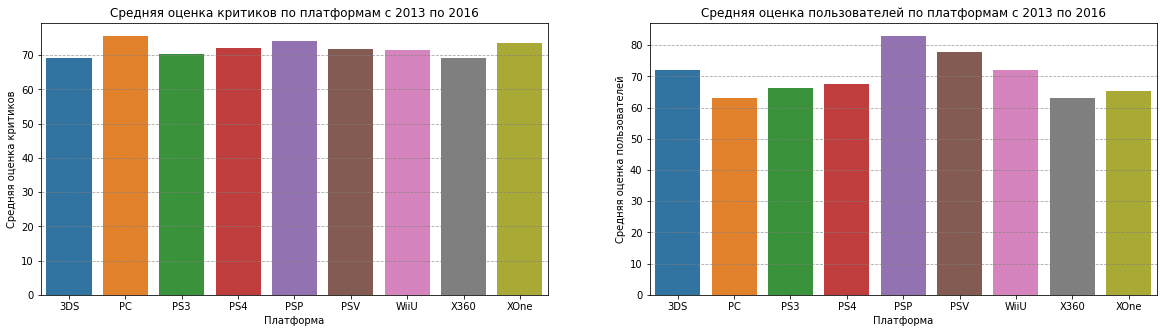

In [24]:
# Фильтруем строки с маркерным значением 404 в critic_score и user_score
df_score = df_actual.loc[(df_actual['critic_score'] != 404) & (df_actual['user_score'] != 404)]

# Группируем данные по платформе и рассчитываем средние оценки
platform_score = df_score.groupby('platform')[['critic_score', 'user_score']].mean().reset_index()



# Строим график средних оценок пользователей для каждой платформы
fig, axs = plt.subplots(ncols=2, figsize=(20, 5))
sns.barplot(x='platform', y='user_score', data=platform_score, ax=axs[1])
axs[1].set_title('Средняя оценка пользователей по платформам c 2013 по 2016')
axs[1].set_xlabel('Платформа')
axs[1].set_ylabel('Средняя оценка пользователей')
axs[1].grid(axis='y', linestyle='--', which='both', color='grey', alpha=0.7)
axs[0].set_yticks(range(0, 100, 10))  # Установка делений по оси y от 0 до 100 с шагом 10

# Строим график средних оценок критиков для каждой платформы
sns.barplot(x='platform', y='critic_score', data=platform_score, ax=axs[0])
axs[0].set_title('Средняя оценка критиков по платформам c 2013 по 2016')
axs[0].set_xlabel('Платформа')
axs[0].set_ylabel('Средняя оценка критиков')
axs[0].grid(axis='y', linestyle='--', which='both', color='grey', alpha=0.7)




- Средние оценки критиков за актуальный период по всем популярным платформам находятся в районе 70. Диапазон средних оценок пользователей ощутимо шире диапазона оценок критиков.
- В оценках пользователей выбивается **PSP** со средним выше 80, нужно будет внимательнее присмотреться к этим записям.

Теперь изучим, как хорошо продаются игры в зависимости от оценок критиков и пользователей по каждой платформе.

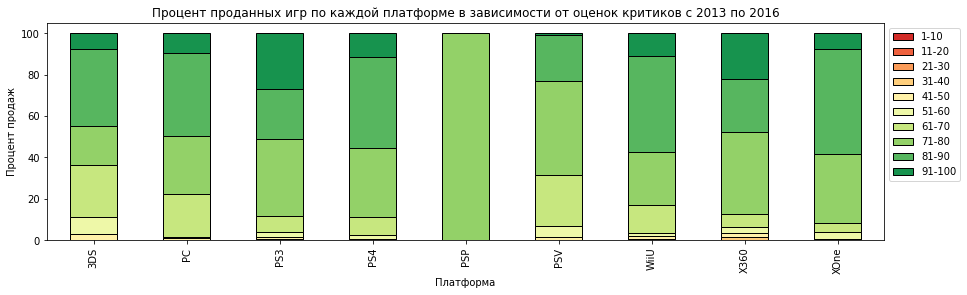

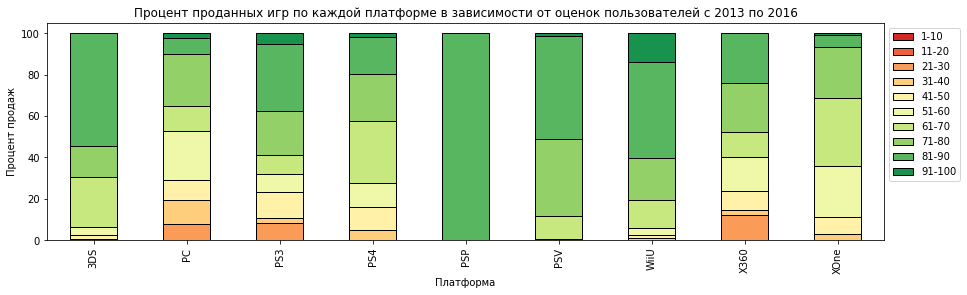

In [25]:
# Создаем массив с категориями оценок
bins = np.arange(0, 101, 10)

# Создаем метки для категорий
labels = [str(i) for i in bins[1:]]

# Создаем копию df_score (без этого notebook ругается)
df_score_copy = df_score.copy()

# Создаем новый столбец 'user_score_bin' в df_score_copy, который указывает категорию оценки пользователей
df_score_copy.loc[:, 'user_score_bin'] = pd.cut(df_score_copy['user_score'], bins=bins, labels=labels, include_lowest=True)

# Создаем новый столбец 'critic_score_bin' в df_score_copy, который указывает категорию оценки пользователей
df_score_copy.loc[:, 'critic_score_bin'] = pd.cut(df_score_copy['critic_score'], bins=bins, labels=labels, include_lowest=True)

# Группируем по 'platform' и 'user_score_bin', и вычисляем сумму 'total_sales' для каждой группы
user_grouped = df_score_copy.groupby(['platform', 'user_score_bin'])['total_sales'].sum().reset_index()

# Группируем по 'platform' и 'user_score_bin', и вычисляем сумму 'total_sales' для каждой группы
critic_grouped = df_score_copy.groupby(['platform', 'critic_score_bin'])['total_sales'].sum().reset_index()

# Перестраиваем сгруппированный dataframe, чтобы создать новый dataframe 'user_score'
user_score = user_grouped.pivot(index='platform', columns='user_score_bin', values='total_sales')
# Перестраиваем сгруппированный dataframe, чтобы создать новый dataframe 'critic_score'
critic_score = critic_grouped.pivot(index='platform', columns='critic_score_bin', values='total_sales')
# Заменяем пропуски на 0
user_score.fillna(0, inplace=True)
critic_score.fillna(0, inplace=True)

# Вычисляем сумму продаж для каждой платформы
total_sales = user_score.sum(axis=1)

# Преобразуем продажи в проценты
for column in user_score.columns:
    user_score[column] = user_score[column] / total_sales * 100
for column in critic_score.columns:
    critic_score[column] = critic_score[column] / total_sales * 100

# Группируем по платформам и категориям оценок и вычисляем сумму глобальных продаж для каждой группы
user_grouped = df_score_copy.groupby(['platform', 'user_score_bin'])['total_sales'].sum().reset_index()
critic_grouped = df_score_copy.groupby(['platform', 'critic_score_bin'])['total_sales'].sum().reset_index()

# Создаем переменную с обозначениями категорий оценки для легенды
labels = [f'{int(label)-10+1}-{label}' for label in user_score.columns]
# Строим график проданных игр по каждой платформе в зависимости от оценок пользователей
critic_score.plot(kind='bar', stacked=True, color = sns.color_palette("RdYlGn", len(critic_score.columns)), figsize=(15, 4), edgecolor='black')
plt.title('Процент проданных игр по каждой платформе в зависимости от оценок критиков c 2013 по 2016')
plt.xlabel('Платформа')
plt.ylabel('Процент продаж')
plt.legend(labels, loc='upper left', bbox_to_anchor=(1.0, 1.0))
plt.show()

# Строим график проданных игр по каждой платформе в зависимости от оценок критиков
user_score.plot(kind='bar', stacked=True, color = sns.color_palette("RdYlGn", len(critic_score.columns)), figsize=(15, 4), edgecolor='black')
plt.title('Процент проданных игр по каждой платформе в зависимости от оценок пользователей c 2013 по 2016')
plt.xlabel('Платформа')
plt.ylabel('Процент продаж')
plt.legend(labels, loc='upper left', bbox_to_anchor=(1.0, 1.0))
plt.show()


- Большинство проданных копий игр по всем платформам за актуальный период имеют оценки критиков *71* и выше.
- Большинство проданных копий игр по всем платформам за актуальный период имеют оценки пользователей *61* и выше. Исключение - **ПК**, где доля проданных игр с оценками *31-60* выше, чем игр с оценками *61-100*.
- Графики с оценками **PSP** выглядят так, будто в них попала всего одна игра. Убедимся в этом и исключим ее из дальнейших исследований.

In [26]:
display(df_score[df_score ['platform']== 'PSP'])
df_score = df_score[df_score ['platform']!= 'PSP']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
8969,Summon Night 5,PSP,2013,Role-Playing,0.0,0.0,0.15,0.0,74.0,83.0,T,0.15


### Построим диаграммы размаха по глобальным продажам игр для актуальных платформ.

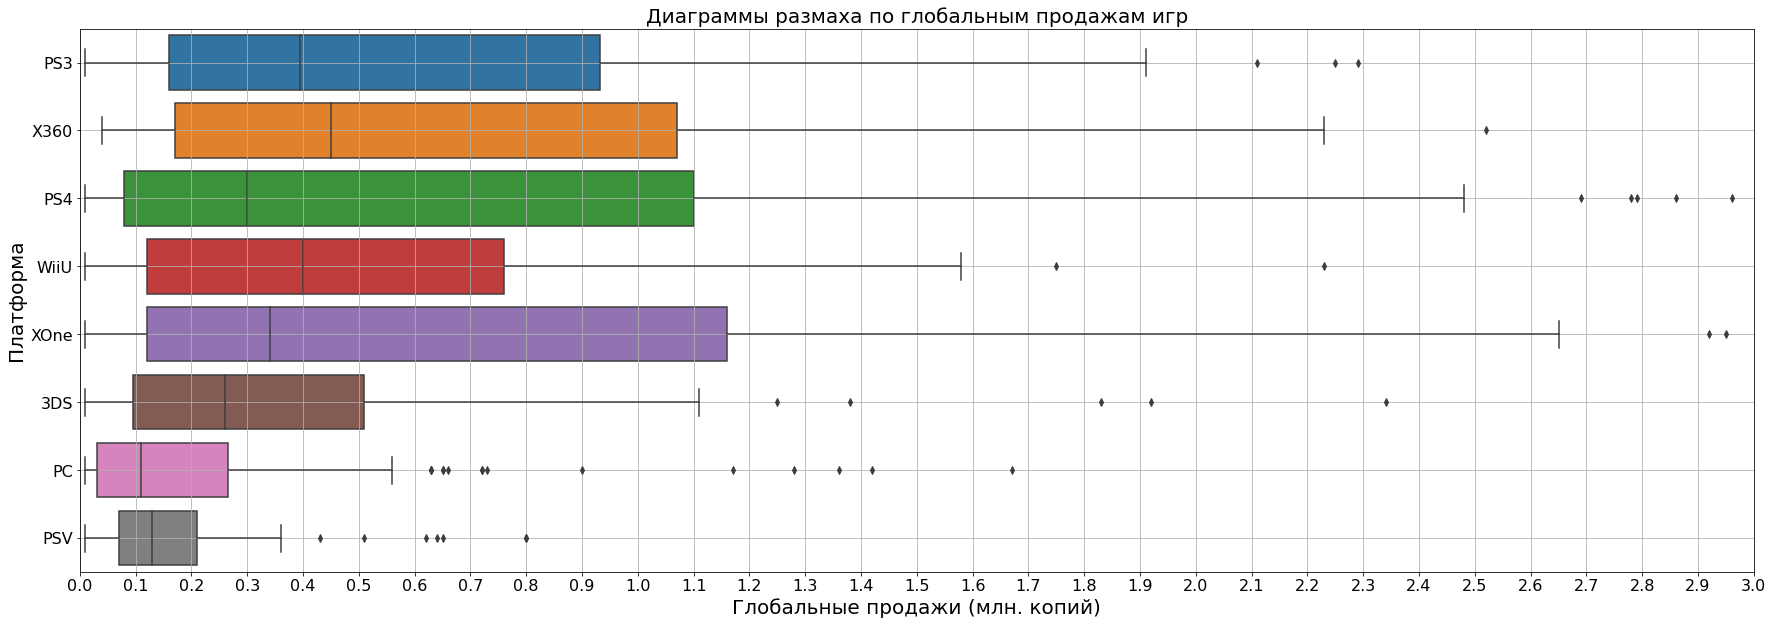

In [27]:

#Задаем размер графика
plt.figure(figsize=(30, 10))
#Cтроим график
sns.boxplot(y="platform", x='total_sales', data=df_score)
plt.xlim(0, 3)
plt.title('Диаграммы размаха по глобальным продажам игр', fontsize=20)
plt.xlabel('Глобальные продажи (млн. копий)', fontsize=20)
plt.ylabel('Платформа', fontsize=20)
plt.xticks(np.arange(0, 3.1, 0.1), fontsize=16)
plt.yticks(fontsize=16)
plt.grid()
plt.show()

- Медиана по продажам популярных консолей за актуальный период варьируется ~ от 0.1 до 0.45 млн проданных копий.
- Верхняя граница предела, за которыми продажи определяются как аномально высокие у **Xbox One** и **PS4** ~ 2.65 и 2.48 соответствено. У их предшедвственниц **Xbox 360** и **PS3**  ~ 2.23 и 1.91 соответственно. Далее идет **WiiU** ~ 1.58, **3DS** ~ 1.11, **ПК** ~ 0.57 и **PS Vita** ~ 0.37.
- В очередной раз видны разочаровывающие продажи **PS Vita**, уступающие даже традиционно невысоким продажам на **ПК**.

### Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами для самой популярной из актуальных платформ.

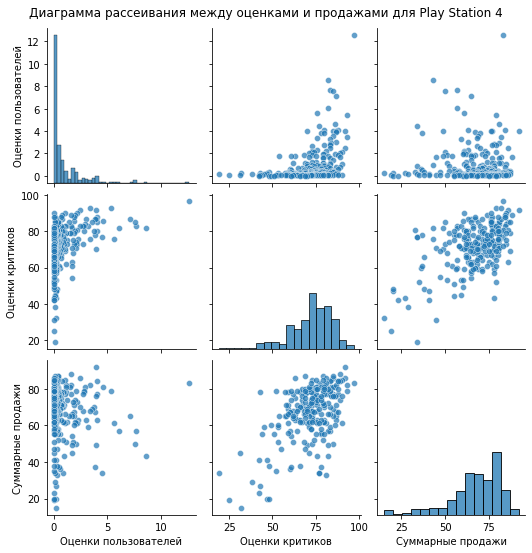

,Оценки пользователей,Оценки критиков,Суммарные продажи
Оценки пользователей,1.000000,0.405895,-0.033625
Оценки критиков,0.405895,1.000000,0.557654
Суммарные продажи,-0.033625,0.557654,1.000000


In [28]:
# Строим диаграмму рассеяния
ps4 = sns.pairplot(df_score[df_score['platform'] == 'PS4'][['total_sales', 'critic_score', 'user_score']], plot_kws={'alpha': 0.7})

# Изменяем подписи осей
ps4.axes[0,0].set_ylabel('Оценки пользователей')
ps4.axes[1,0].set_ylabel('Оценки критиков')
ps4.axes[2,0].set_ylabel('Суммарные продажи')
ps4.axes[2,0].set_xlabel('Оценки пользователей')
ps4.axes[2,1].set_xlabel('Оценки критиков')
ps4.axes[2,2].set_xlabel('Суммарные продажи')
plt.suptitle('Диаграмма рассеивания между оценками и продажами для Play Station 4', y=1.02)
plt.show()

# Строим матрицу корреляции
corr_matrix = df_score[df_score['platform']== 'PS4'][['total_sales', 'critic_score', 'user_score']].corr()

corr_matrix.index = ['Оценки пользователей', 'Оценки критиков', 'Суммарные продажи']
corr_matrix.columns = ['Оценки пользователей', 'Оценки критиков', 'Суммарные продажи']

display(corr_matrix)

- Корреляция между отзывами критиков и продажами на PS4 за актуальный период умеренная ~ 0.4.
- Корреляция между отзывами пользователей и продажами на PS4 за актуальный период не выявлена ~ 0.03.

Сравним с продажами игр на остальных популярных платформах за актуальный период.

<div class="alert alert-block alert-success">

**Комментарий ревьювера (все отлично)**
    
Коэффициент корреляции верно интерпретированы👍
</div>


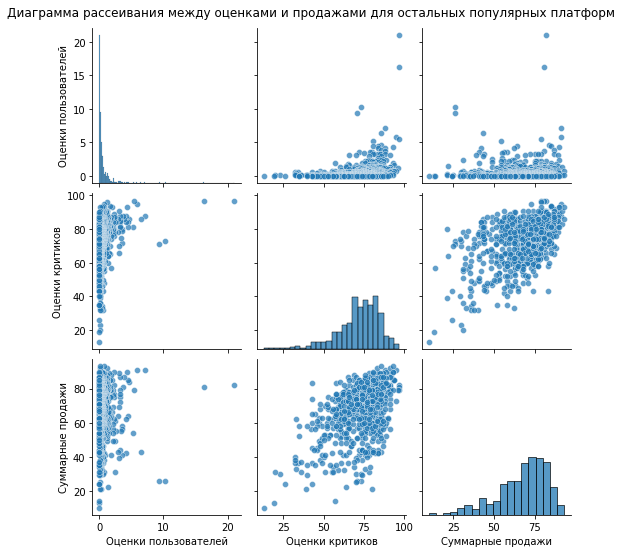

,Оценки пользователей,Оценки критиков,Суммарные продажи
Оценки пользователей,1.000000,0.278847,0.007321
Оценки критиков,0.278847,1.000000,0.484718
Суммарные продажи,0.007321,0.484718,1.000000


In [29]:
# Строим диаграмму рассеяния
etc = sns.pairplot(df_score[df_score['platform'] != 'PS4'][['total_sales', 'critic_score', 'user_score']], plot_kws={'alpha': 0.7})

# Изменяем подписи осей
etc.axes[0,0].set_ylabel('Оценки пользователей')
etc.axes[1,0].set_ylabel('Оценки критиков')
etc.axes[2,0].set_ylabel('Суммарные продажи')
etc.axes[2,0].set_xlabel('Оценки пользователей')
etc.axes[2,1].set_xlabel('Оценки критиков')
etc.axes[2,2].set_xlabel('Суммарные продажи')
plt.suptitle('Диаграмма рассеивания между оценками и продажами для остальных популярных платформ', y=1.02)
plt.show()

# Строим матрицу корреляции
corr_matrix = df_score[df_score['platform']!= 'PS4'][['total_sales', 'critic_score', 'user_score']].corr()
corr_matrix.index = ['Оценки пользователей', 'Оценки критиков', 'Суммарные продажи']
corr_matrix.columns = ['Оценки пользователей', 'Оценки критиков', 'Суммарные продажи']
display(corr_matrix)

- Корреляция между отзывами критиков и продажами на остальных популярных платформах за актуальный период слабая ~ 0.27
- Корреляция между отзывами пользователей и продажами на остальных популярных платформах за актуальный период не выявлена <0.01

Видно, что оценки критиков связаны с суммарными продажами на **PS4** сильнее, чем на остальных платформах.
Оценки пользователей не коррелируют с суммарными продажами в обеих выборках.

### Изучим распределение игр по жанрам за актуальный период в зависимости от их прибыли

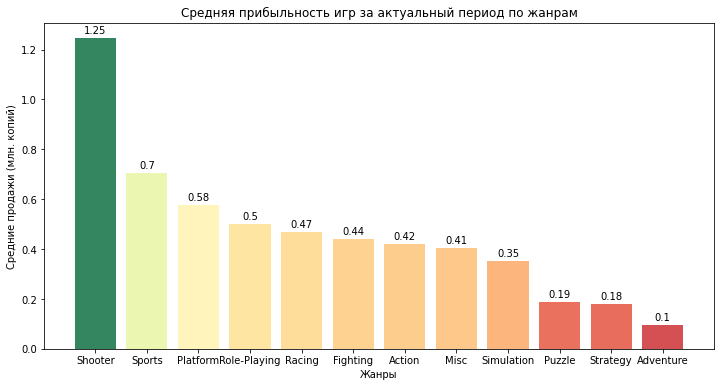

In [30]:
# Группируем данные по жанрам и считаем средние продажи
genre_sales_actual = df_actual.groupby('genre')['total_sales'].mean()


sorted_genre_sales = genre_sales_actual.sort_values(ascending=False)

# Создаем цветовую карту от красного к зеленому
cmap = plt.get_cmap('RdYlGn')

# Строим график
plt.figure(figsize=(12, 6))
bars = plt.bar(sorted_genre_sales.index, sorted_genre_sales.values, color=cmap(sorted_genre_sales.values / sorted_genre_sales.values.max()), alpha=0.8)

# Добавляем подписи к столбцам
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, round(yval, 2), ha='center', va='bottom')

plt.title('Средняя прибыльность игр за актуальный период по жанрам')
plt.xlabel('Жанры')
plt.ylabel('Средние продажи (млн. копий)')
plt.show()

- Самые прибыльный жанр за актуальный период с большим отрывом - **Шутер** (в среднем ~ 1,25 млн. проданных копий)
- За ним идут **Спорт** (в среднем 0.7 млн.), **Платформеры** (0.58 млн.) и **Ролевые игры**, несмотря на то, что ролевые игры требуют гораздо больше ресурсов и времени, чем спортивные.
- Далее **Гонки**, **Файтинги**, **Экшены** и **Остальные**(игры, не относящиеся четко к традиционному жанру) показываают близкие средние значения в 0.47, 0.44, 0.42 и 0.41 млн. проданных копий. За ними **Симуляторы**  с 0.35 млн.
- Замыкают рейтинг **Пазлы** (0,19 млн.), **Стратегии** (0,18 млн.) и **Адвенчуры** (Квесты) с 0.1 млн. проданных копий в среднем. Особенно в глаза брасаются **Стратегии** требующие как правило больших ресурсов на разработку, оптимизацию неэткода и балансировку механик. Неудивительно, что главная киберспортивная дисциплина среди стратегий до сих пор Star Craft 2, вышедший 14 лет назад.

**Промежуточный вывод**:

В ходе исследовательского анализа мы узнали следующее:
- Большинство проданных копий игр по всем платформам за актуальный период имеют оценки критиков выше 70 и оценки пользователей выше 60. Несмотря на это, корреляция между оценками критиков и продажами умеренная или ниже, а корреляции между оценками пользователей и продажами отсутствует вовсе. Возможно именно эти исследования привели к тому, что крупные игровые издатели каждый год выпускают все больше дорогих низкокачественных игр с отвратительной оптимизацией и посредственным контентом.
- Самый низкий порог приемлемости игр по оценкам пользователей  - **ПК** - более половины проданных игр имеют рейтинг ниже 60. Вероятнее всего, это объясняется доступностью инструментов разработки и дистрибьюции для этой платформы, что приводит к выпуску большого количества в том числе некачественных проектов от студий всех мастей.
- Самый прибыльный видеоигровой жанр - **Шутеры**, однако стоит обратить внимание на **Спортивные игры** - хотя их средние продажи почти в 2 раза меньше, чем у **Шутеров**, ресурсы, требующиеся на разработку несопоставимо меньше. Как показывает пример Pro Evolution Soccer, можно обойтись даже без лицензий от спортивных организаций. Плюс геймеры привыкли покупать новую версию их любимой спортивной игры каждый год.

## Портрет пользователя каждого региона.

### Изучим самые популярные платформы и жанры в регионах NA (Северная Америка), EU (Европа) и JP (Япония).

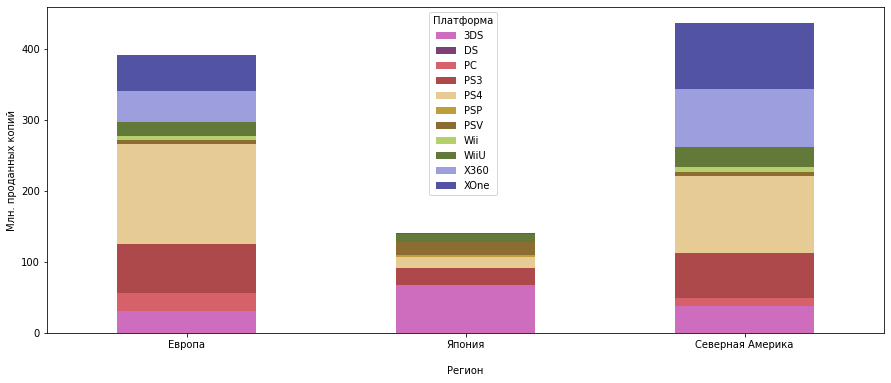

In [31]:
# Создаем таблицу с интересующими нас данными
region_df = pd.DataFrame(columns=['region', 'platform', 'sales'])
for platform in df_actual['platform'].unique():
    for region in ['na_sales', 'eu_sales', 'jp_sales']:
        sales = df_actual[df_actual['platform'] == platform][region].sum()
        region_df = region_df.append({'region': region[:-6], 'platform': platform, 'sales': sales}, ignore_index=True)

# Группируем данные по платформам и регионам
region_grouped = region_df.groupby(['region', 'platform'])['sales'].sum().unstack()
# Задаем цветовую палитру
palette = sns.color_palette("tab20b_r", len(region_grouped.columns))
# Строим график
fig, ax = plt.subplots(figsize=(15, 6))  
region_grouped.plot(kind='bar', stacked=True, ax=ax, color=palette)
ax.set_ylabel('Млн. проданных копий')
ax.xaxis.set_label_coords(0.5, -0.1)
ax.set_xlabel('Регион')
plt.xticks(rotation=0)
ax.legend(title='Платформа', bbox_to_anchor=(0.45, 1), loc='upper left')
# Подписываем регионы на оси x
ax.set_xticklabels(['Европа' if x == 'eu' else 'Япония' if x == 'jp' else 'Северная Америка' for x in region_grouped.index])
plt.show()


-  Самая популярная платформа в Европе  **PS4** с большим отрывом. Далее идет **PS3**, за ней **Xbox One** и **Xbox 360**.
-  Самая популярная платформа в Японии  **Nintendo 3DS** - больше половины продаж. Далее идут **PS3** и **PS Vita**, а **PS4** только на четвертом месте. Продажи консолей майкрософт на графике почти не видны.
-  Самая популярная платформа в Северной Америке **PS4**, за ней **Nintendo DS**, за ней c минимальным отрывом **Xbox One**. Далее идет **PS3**, и только потом доминирующая в Японии **Nintendo 3DS*.

### Изучим, влияет ли рейтинг ESRB на продажи в отдельном регионе.

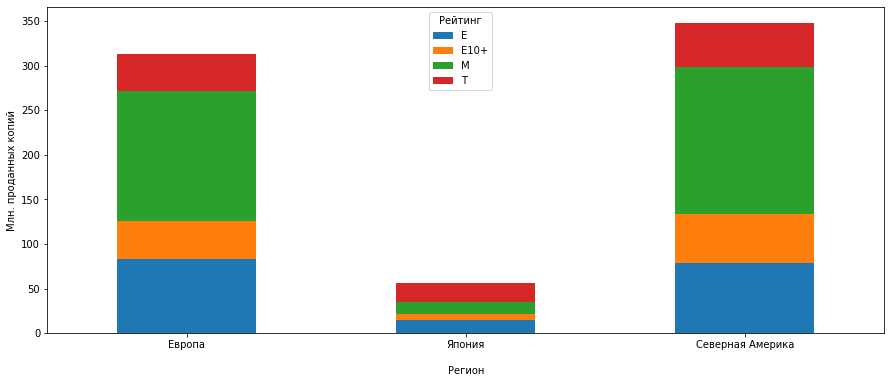

In [32]:
region_esrb = pd.DataFrame(columns=['region', 'rating', 'sales'])
df_esrb = df_actual[df_actual['rating'] != 404]
for rating in df_esrb['rating'].unique():
    for region in ['na_sales', 'eu_sales', 'jp_sales']:
        sales = df_esrb[df_esrb['rating'] == rating][region].sum()
        region_esrb = region_esrb.append({'region': region[:-6], 'rating': rating, 'sales': sales}, ignore_index=True)
        
# Группируем данные по рейтингам и регионам
esrb_grouped = region_esrb.groupby(['region', 'rating'])['sales'].sum().unstack()

# Строим график
fig, ax = plt.subplots(figsize=(15, 6))  
esrb_grouped.plot(kind='bar', stacked=True, ax=ax)
ax.set_ylabel('Млн. проданных копий')
ax.xaxis.set_label_coords(0.5, -0.1)
ax.set_xlabel('Регион')
plt.xticks(rotation=0)
ax.legend(title='Рейтинг', bbox_to_anchor=(0.45, 1), loc='upper left')
# Подписываем регионы на оси x
ax.set_xticklabels(['Европа' if x == 'eu' else 'Япония' if x == 'jp' else 'Северная Америка' for x in esrb_grouped.index])
plt.show()



- В Европе и Северной Америке ситуация почти одинаковая. Лидируют по продажам игры с рейтингом M, за ними E, у оставшихся E10+ и T почти одинаковая доля.
- В Японии ситуация отличается. Здесь лидируют игры с рйтингом T, за ними с почти одинаковой долей M и E, а рейтинг E10+ в аутсайдерах. Видно, что в Японии видеоигры - в первую очередь развлечение для подростков.

### Изучим популярность разных жанров по регионам.

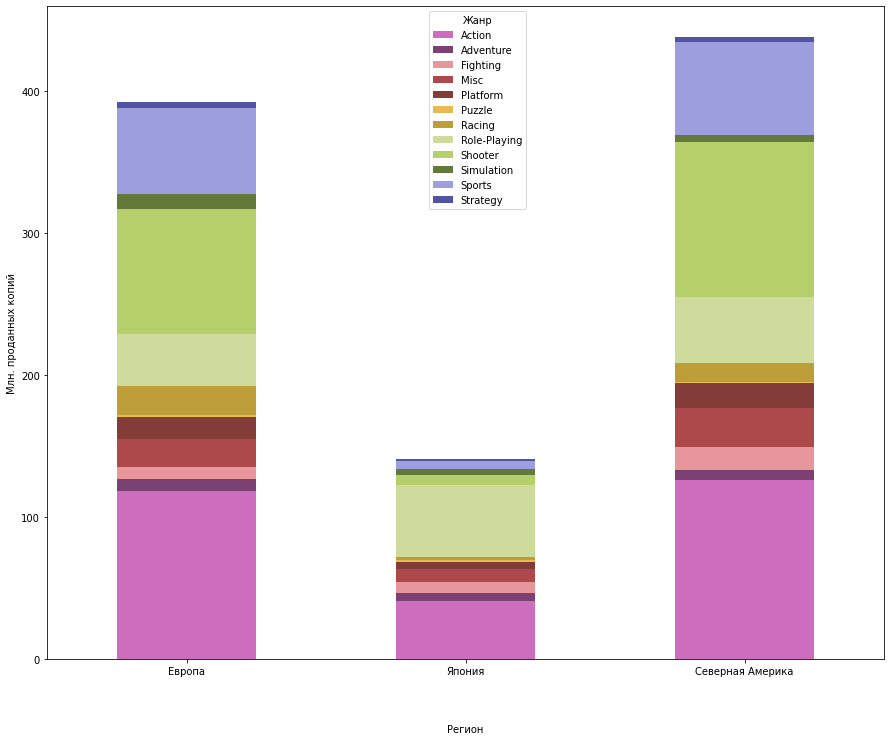

In [33]:
region_genre = pd.DataFrame(columns=['region', 'genre', 'sales'])
df_genre = df_actual[df_actual['genre'] != 404]
for genre in df_genre['genre'].unique():
    for region in ['na_sales', 'eu_sales', 'jp_sales']:
        sales = df_genre[df_genre['genre'] == genre][region].sum()
        region_genre = region_genre.append({'region': region[:-6], 'genre': genre, 'sales': sales}, ignore_index=True)
        
# Группируем данные по рейтингам и регионам
genre_grouped = region_genre.groupby(['region', 'genre'])['sales'].sum().unstack()

# Строим график
palette = sns.color_palette("tab20b_r", len(genre_grouped.columns))
fig, ax = plt.subplots(figsize=(15, 12))  
genre_grouped.plot(kind='bar', stacked=True, ax=ax, color=palette)
ax.set_ylabel('Млн. проданных копий')
ax.xaxis.set_label_coords(0.5, -0.1)
ax.set_xlabel('Регион')
plt.xticks(rotation=0)
ax.legend(title='Жанр', bbox_to_anchor=(0.45, 1), loc='upper left')
# Подписываем регионы на оси x
ax.set_xticklabels(['Европа' if x == 'eu' else 'Япония' if x == 'jp' else 'Северная Америка' for x in genre_grouped.index])
plt.show()

- Как и в случае с возростными рейтингами, картина в **Европе** и **Северной Америке** очень схожая - Лидируют **Экшены**, далее **Шутеры**, за ними **Спортивные** игры.
- В **Японии** же остальные популярные категории обгоняет традиционно японский жанр **Ролевых** игр. Родина Dragon Quest, Final Fantasy и покемонов каждый год выпускает огромное количество пошаговых рпг с упором на историю и диалоги, большинство из которых никогда не покидает внутреннего рынка и зачастую даже не переводятся на другие языки. В остальном распределение жанров схоже с западным рынком, исключая сильно уменьшеную долю **Шутеров** и **Спортивных** игр.

**Промежуточный вывод**:
-  Продажи видеоигр в **Японии** сильно уступают продажам в **Европе** и **Северной Америке**. В первую очередь следует ориентироваться на западный рынок.
-  На западе видеоигры давно перестали быть развлечением для детей и подростков - самые продаваемые игры там имеют рейтинг **M**.
-  В **Японии** рынком правят консоли от местных производителей - **Sony** и **Nintendo**, а доля портативных игр привышает долю игровых консолей. Самая попуярная консоль там - **Nintendo 3DS**, в отличие от запада, где ее продажи ее игр до сих пор не смогли догнать даже ее предшественницу **DS**.
- Самые популярные жанры игр на западе - **Экшены**, **Шутеры** и **Спорт**. В Японии же - **Ролевые** игры и **Экшены**

## Проверка гипотез.

### Проверим гипотезу "Средние пользовательские рейтинги платформ Xbox One и PC одинаковые".

Используем t-критерий Стьюдента, т.к. выборки независимы между собой.

**Нулевая гипотеза** - средние пользовательские рейтинги платформ Xbox One и PC равны между собой.

**Альтернативная гипотеза** - средние пользовательские рейтинги платформ Xbox One и PC не равны между собой.

Определим пороговое значение alpha = 0.05

При успехе теста гипотеза подтвердится.

p-значение равно  0.17306926618147386
Не получилось отвергнуть нулевую гипотезу
Cредние пользовательские рейтинги платформ Xbox One и PC равны между собой.


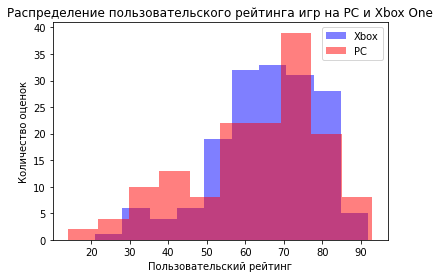

Cредний пользовательский рейтинг на Xbox One -  65.38181818181818
Cредний пользовательский рейтинг на ПК -  63.020270270270274


In [34]:
#Фильтруем интересующие нас данные
xbox_score = df_score[df_score['platform'] == 'XOne']['user_score']
pc_score = df_score[df_score['platform'] == 'PC']['user_score']
alpha = 0.05
#Проводим тест
result = st.ttest_ind(xbox_score, pc_score)
print('p-значение равно ', result.pvalue)

if (result.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
    print("Cредние пользовательские рейтинги платформ Xbox One и PC не равны между собой.")
else:
    print("Не получилось отвергнуть нулевую гипотезу")
    print("Cредние пользовательские рейтинги платформ Xbox One и PC равны между собой.")
#Убедимся в результатах. Выведем гистограммы пользовательского рейтинга для обеих платформ и пощитаем их среднее    

# Создаем гистограмму для xbox_score
plt.hist(xbox_score, label='Xbox', alpha=0.5, color='blue')

# Создаем гистограмму для pc_score
plt.hist(pc_score, label='PC', alpha=0.5, color='red')

# Подписываем оси координат
plt.xlabel('Пользовательский рейтинг')
plt.ylabel('Количество оценок')
plt.title('Распределение пользовательского рейтинга игр на PC и Xbox One')
plt.legend()

# Отображаем графики
plt.show()
print ('Cредний пользовательский рейтинг на Xbox One - ', xbox_score.mean())
print ('Cредний пользовательский рейтинг на ПК - ',pc_score.mean())

Гипотиза подтвердилась. Средние оценки пользователей для игр **Xbox One** и **ПК** достаточно близки.

### Проверим гипотезу "Средние пользовательские рейтинги Экшенов и Спортивных игр разные".

Используем t-критерий Стьюдента, т.к. выборки независимы между собой.

**Нулевая гипотеза** - средние пользовательские рейтинги жанров Action и Sports равны между собой.

**Альтернативная гипотеза** - средние пользовательские рейтинги  жанров Action и Sports не равны между собой.


Определим пороговое значение alpha = 0.05

При провале теста гипотеза подтвердится.

p-значение равно  1.6840994306901232e-16
Отвергаем нулевую гипотезу
Cредние пользовательские рейтинги жанров Action и Sports равны между собой.


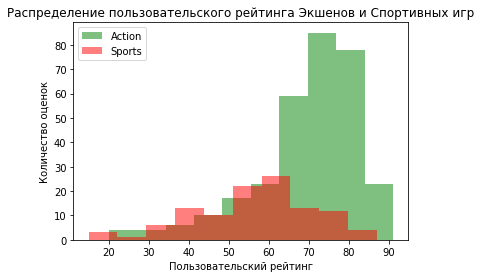

Cредний пользовательский рейтинг для Экшенов -  69.36245954692556
Cредний пользовательский рейтинг для Спортивных игр -  56.654545454545456


In [35]:
#Фильтруем интересующие нас данные
action_score = df_score[df_score['genre'] == 'Action']['user_score']
sports_score = df_score[df_score['genre'] == 'Sports']['user_score']
alpha = 0.05
#Проводим тест
result = st.ttest_ind(action_score, sports_score)
print('p-значение равно ', result.pvalue)

if (result.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
    print("Cредние пользовательские рейтинги жанров Action и Sports равны между собой.")
else:
    print("Не получилось отвергнуть нулевую гипотезу")
    print("Cредние пользовательские рейтинги жанров Action и Sports не равны между собой.")
#Убедимся в результатах. Выведем гистограммы пользовательского рейтинга для обоих жанров и пощитаем их среднее    

# Создаем гистограмму для action_score
plt.hist(action_score, label='Action', alpha=0.5, color='green')

# Создаем гистограмму для sports_score
plt.hist(sports_score, label='Sports', alpha=0.5, color='red')

# Подписываем оси координат
plt.xlabel('Пользовательский рейтинг')
plt.ylabel('Количество оценок')
plt.title('Распределение пользовательского рейтинга Экшенов и Спортивных игр')
plt.legend()

# Отображаем график
plt.show()
print ('Cредний пользовательский рейтинг для Экшенов - ', action_score.mean())
print ('Cредний пользовательский рейтинг для Спортивных игр - ',sports_score.mean())

Гипотиза подтвердилась. Средние оценки пользователей для жанров **Экшен** и **Спорт** недостаточно близки.

**Промежуточный вывод:**

Обе гипотезы подтвердились.

- Средние оценки пользователей для игр **Xbox One** и **ПК** достаточно близки (~ 65 и 63 соответсвенно), несмотря на то, что оценки на них распределяются по разному - оценки на **ПК** имеют выраженные пики в районе 70 и 40, а оценки **Xbox One** ближе к нормальному распределению. Важно помнить, что это касается только игр на **ПК**, вышедших за актуальный период (2013-2016). Если бы мы оценивали все компьютерные игры, вышедшие с 1985 года, результат мог получиться другим.
- Средние оценки пользователей для жанров **Экшен** и **Спорт** недостаточно близки (~ 69 и 56 соответсвенно). Это легко объясняется конвеерным производством спортивных игр - новая FIFA выходит каждый год. Экшены же обычно - флагманские проекты, на разработку которых уходит много лет и тратится намного больше рессурсов. 

## Общий вывод.

В ходе исследовательского анализа мы выяснили:

- С точки зрения коммерции, наиболее актуальная платформа - **PS4**. Консоль находится на пике своего жизненного цикла, консоли следующего поколения еще даже не анонсированы. Доля игр, проданых на **Xbox One** так же значима, хоть и значительно меньше, чем PS4. Учитывая схожесть их технических характеристик, имеет смысл параллельная разработка версий для обеих платформ.
- Самая прибыльная портативная платформа - **Nintendo 3DS**, однако, важно помнить, что большая часть ее рынка - это **Япония**,  где на рынке есть ряд своих особенностей.
- **ПК**, в отличие от остальных платформ, не имеет жизненного цикла. Игры, выпущенные на домашний компьютер могут продолжать продаваться спустя десятки лет после выпуска, давая продажам коммулятивный эффект.
- Самые прибыльный жанр по средним продажам- **Шутеры**, но в этом жанре игроки ожидают флагманских проектов с высоким уровнем качества и большим количеством контента. **Спортивные игры** занимают второе место и требуют для разработки гораздо меньше ресурсов. 

В ходе составления портрета пользователя каждого региона мы выяснили:

- Близкие друг другу рынки **Европы** и **Северной Америки** гораздо богаче, чем рынок Японии.
- В **Европе** и **Северной Америке** наибольшей популярностью пользуются игры на домашние консоли последнего поколения. Основная борьба идет между **PS4** и **Xbox One**, и Sony побеждает в ней с большим отрывом. Большинство продаваемых игр имеют рейтинг **M** и ориентированы на аудиторию 17 лет и старше.
- В **Японии** наибольшей популярностью пользуется портативная **Nintendo 3DS**, а большинство продаваемых игр имеют рейтинг **T** и ориентированы на подростков. Доля игр для консоли Microsoft здесь почти не заметна.
- Самые популярные жанры игр на западном рынке - **Экшены**, **Шутеры** и **Спорт**. В Японии же - **Ролевые** игры и **Экшены**

К 2017 году рынок игр постепенно оправляется от обвала, вызванного кризисом 2008 года. Ставку следует делать на западный рынок и на консоли последнего поколения  (**PS4** **Xbox One**). Не стоит также забывать о **Домашних компьютерах**. Разрабатывать стоит **Шутеры**, **Экшены** и **Спортивные игры**. При разработке для портативных платфом стоит акцентировать внимание на **Nintendo 3DS** и **Японском** рынке.